In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import TargetEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
spotify = pd.read_csv('../data/Spotify dataset export 2025-02-10 09-00-03.csv')

In [160]:
spotify.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221,6220896,169907,True,True,1040234854,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645,1079128,31003,True,True,310083733,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055,282142,7399,True,True,63063467,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952,1788577,55229,True,True,434663559,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958,6197318,155930,True,True,617259738,9.942693,Youtube


In [161]:
spotify.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_min', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream',
       'EnergyLiveness', 'most_playedon'],
      dtype='object')

In [162]:
#Scaling the data to make it easier to work with
from sklearn.preprocessing import StandardScaler

numeric_columns = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 
				  'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_min', 
				 'EnergyLiveness']
spotify_scaled = pd.DataFrame(spotify, columns=numeric_columns)

spotify_scaled.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,EnergyLiveness
0,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,3.710667,1.150082
1,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,3.336217,15.183585
2,0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,3.585833,7.956897
3,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,3.897783,11.546875
4,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,5.682000,9.942693


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Distribution of predictors with outliers')

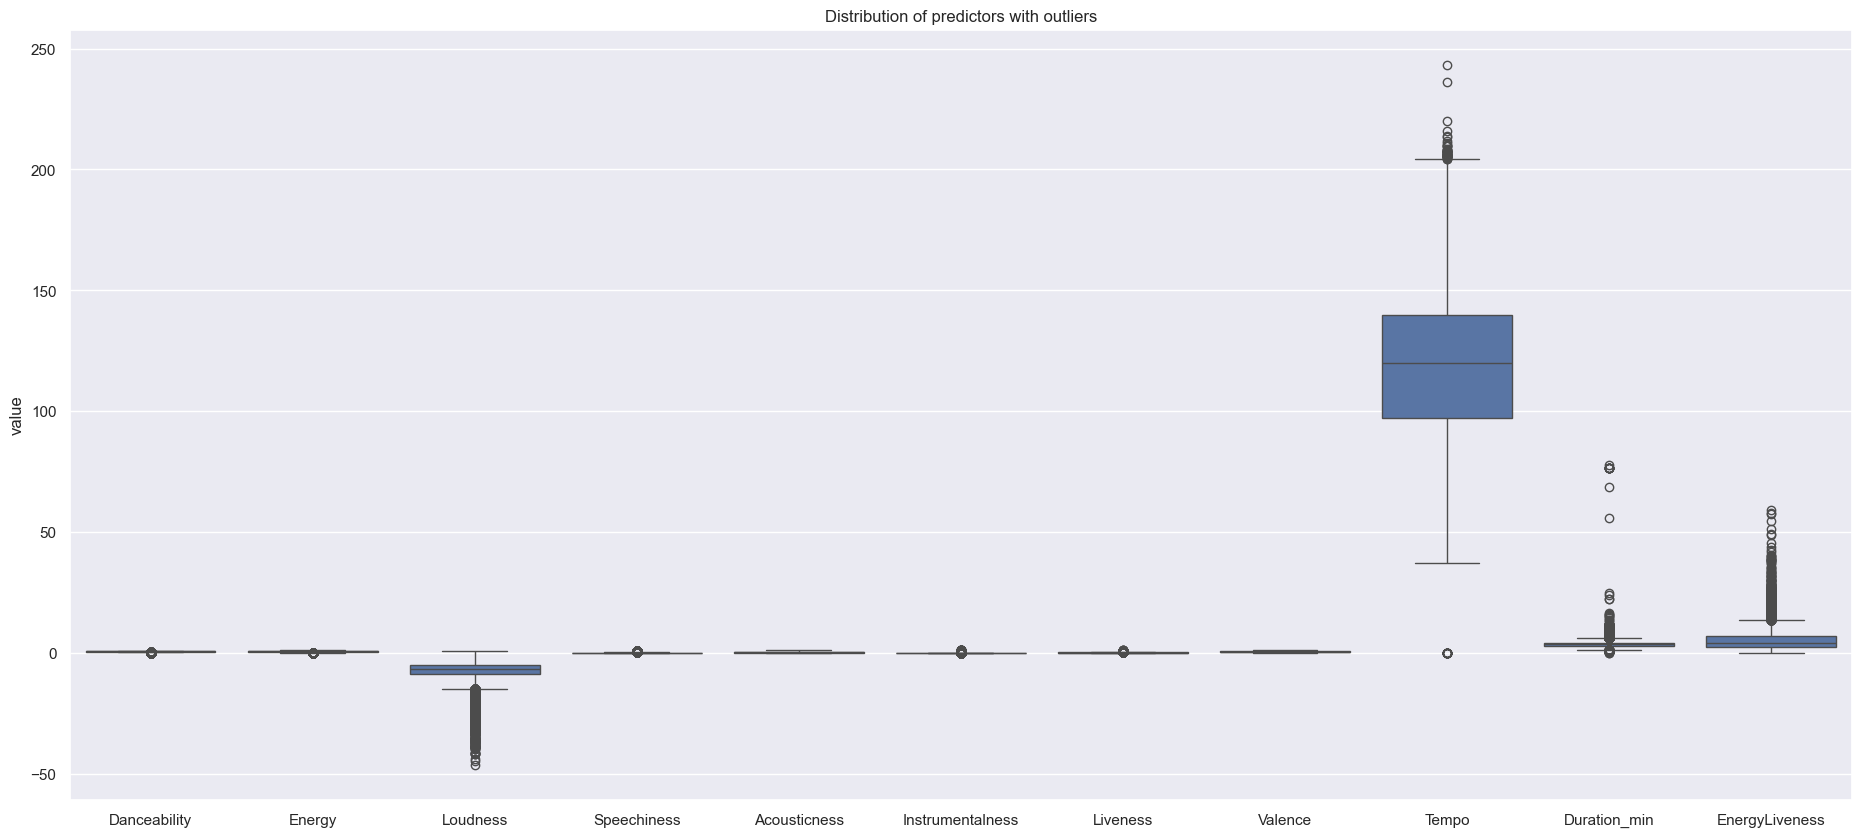

In [94]:

#box plot with outliers
df_melt=pd.melt(spotify_scaled)
df_melt
sns.set(rc={'figure.figsize':(23,10)})
sns.boxplot(x='variable', y='value', data=df_melt)
plt.xlabel(None)
plt.title('Distribution of predictors with outliers')

/var/folders/24/pnnls1cd57zc3t91xz4kyxyc0000gn/T/ipykernel_10058/2073990616.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/24/pnnls1cd57zc3t91xz4kyxyc0000gn/T/ipykernel_10058/2073990616.py:10: UserWarning: 
The palette list has fewer values (6) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is

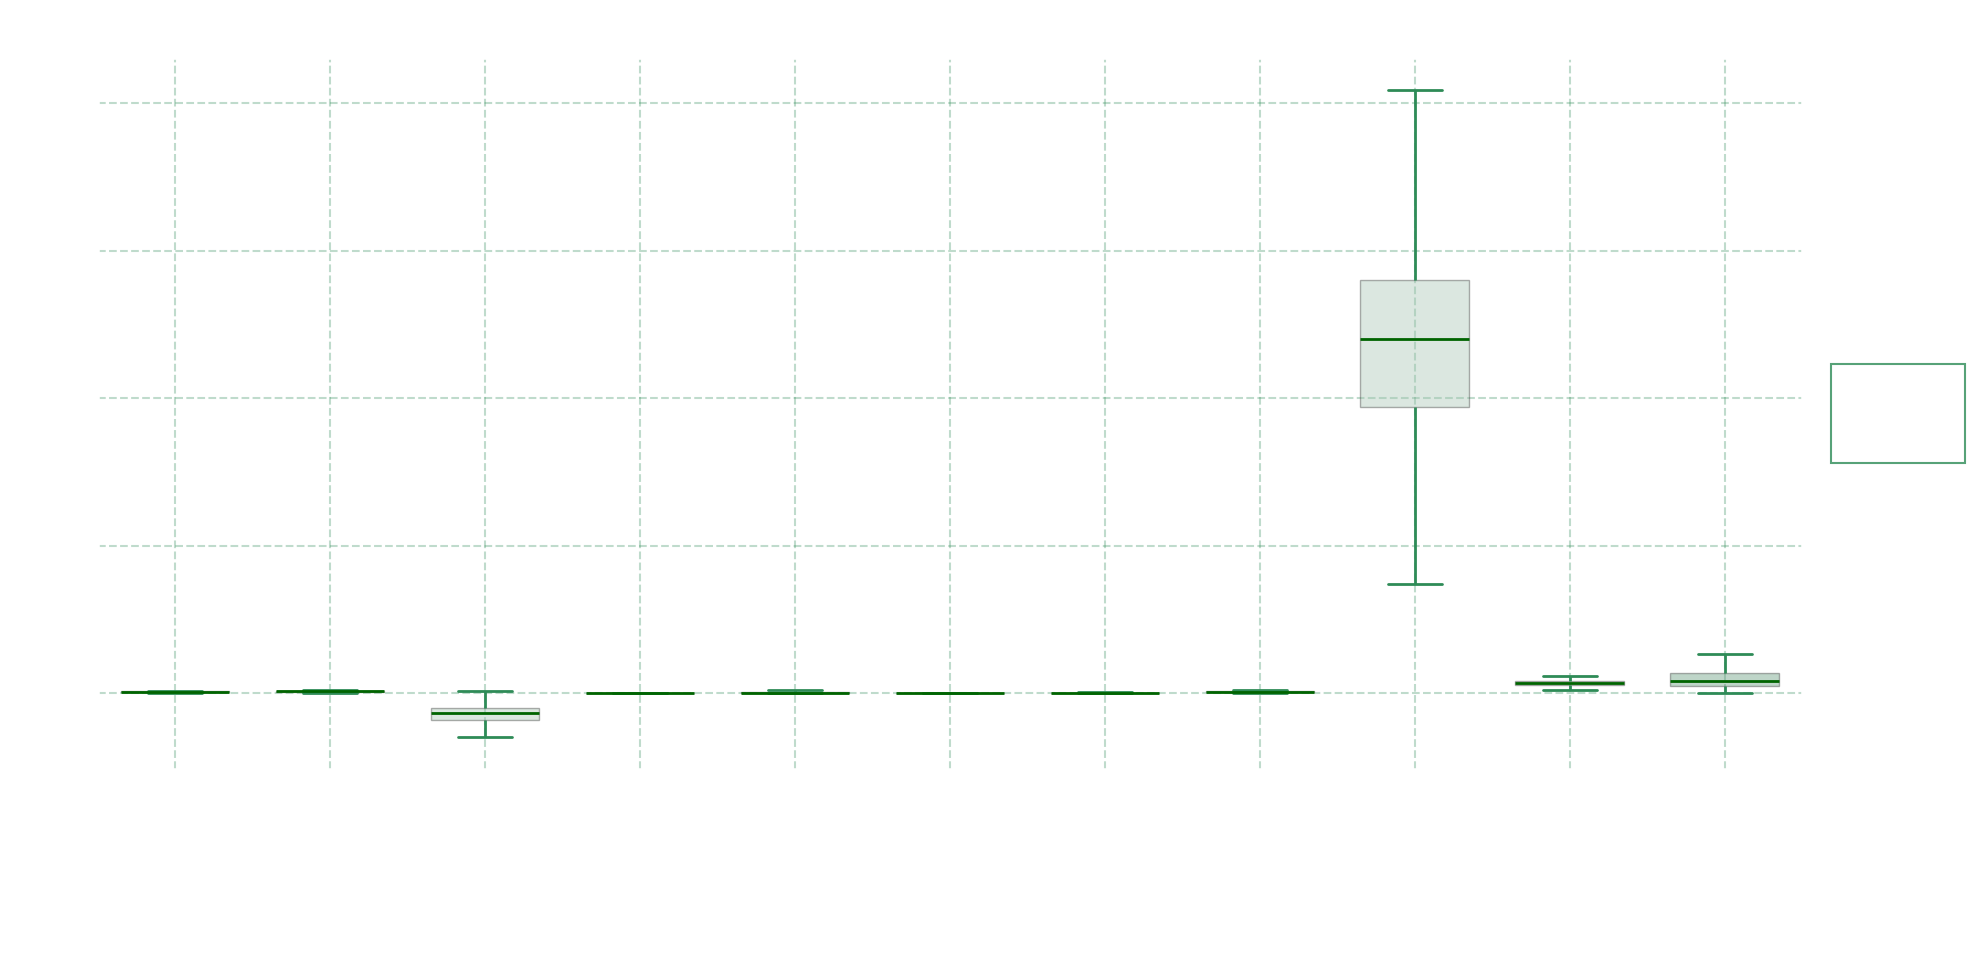

In [163]:
# Configuration du style
sns.set_style("dark")
colors = sns.light_palette("seagreen", n_colors=6)

# Création de la figure avec fond transparent
fig, ax = plt.subplots(figsize=(20, 10))
fig.patch.set_alpha(0.0)

# Création du boxplot avec palette verte
sns.boxplot(
    x='variable',
    y='value',
    data=df_melt,
    showfliers=False,
    width=0.7,
    palette=colors,
    medianprops={"color": "darkgreen", "linewidth": 2},
    boxprops={"alpha": .4},
    whiskerprops={"linewidth": 2, "color": "seagreen"},
    capprops={"linewidth": 2, "color": "seagreen"}
)

# Personnalisation du graphique
plt.title('Distribution des Variables Spotify', 
          fontsize=20, 
          pad=20, 
          fontweight='bold',
          color='white')

plt.xlabel('Variables', fontsize=14, labelpad=10, color='white')
plt.ylabel('Valeurs Normalisées', fontsize=14, labelpad=10, color='white')

# Rotation des labels de l'axe x
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')

# Personnalisation de la grille
ax.grid(True, linestyle='--', alpha=0.3, color='seagreen')

# Ajout d'un fond transparent pour l'axe
ax.set_facecolor('none')

# Ajout de la légende avec statistiques
stats = df_melt.groupby('variable')['value'].agg(['mean', 'std', 'min', 'max'])
legend_text = f"Statistiques :\n"
legend_text += f"Moyenne : {stats['mean'].mean():.2f}\n"
legend_text += f"Écart-type : {stats['std'].mean():.2f}\n"
legend_text += f"Min : {stats['min'].min():.2f}\n"
legend_text += f"Max : {stats['max'].max():.2f}"

plt.text(1.02, 0.5, legend_text,
         transform=ax.transAxes,
         bbox=dict(facecolor='none', edgecolor='seagreen', alpha=0.8),
         fontsize=12,
         color='white',
         verticalalignment='center')

# Ajustement des marges
plt.tight_layout()

# Sauvegarde en PNG transparent
plt.savefig('spotify_distribution.png', 
            dpi=300, 
            bbox_inches='tight',
            transparent=True)

# Affichage du graphique
plt.show()

In [164]:
scaler = StandardScaler()
spotify_scaled = scaler.fit_transform(spotify_scaled)
df_melt = pd.DataFrame(spotify_scaled, columns=numeric_columns)
df_melt = pd.melt(df_melt)


/var/folders/24/pnnls1cd57zc3t91xz4kyxyc0000gn/T/ipykernel_10058/2215249961.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/24/pnnls1cd57zc3t91xz4kyxyc0000gn/T/ipykernel_10058/2215249961.py:10: UserWarning: 
The palette list has fewer values (6) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is

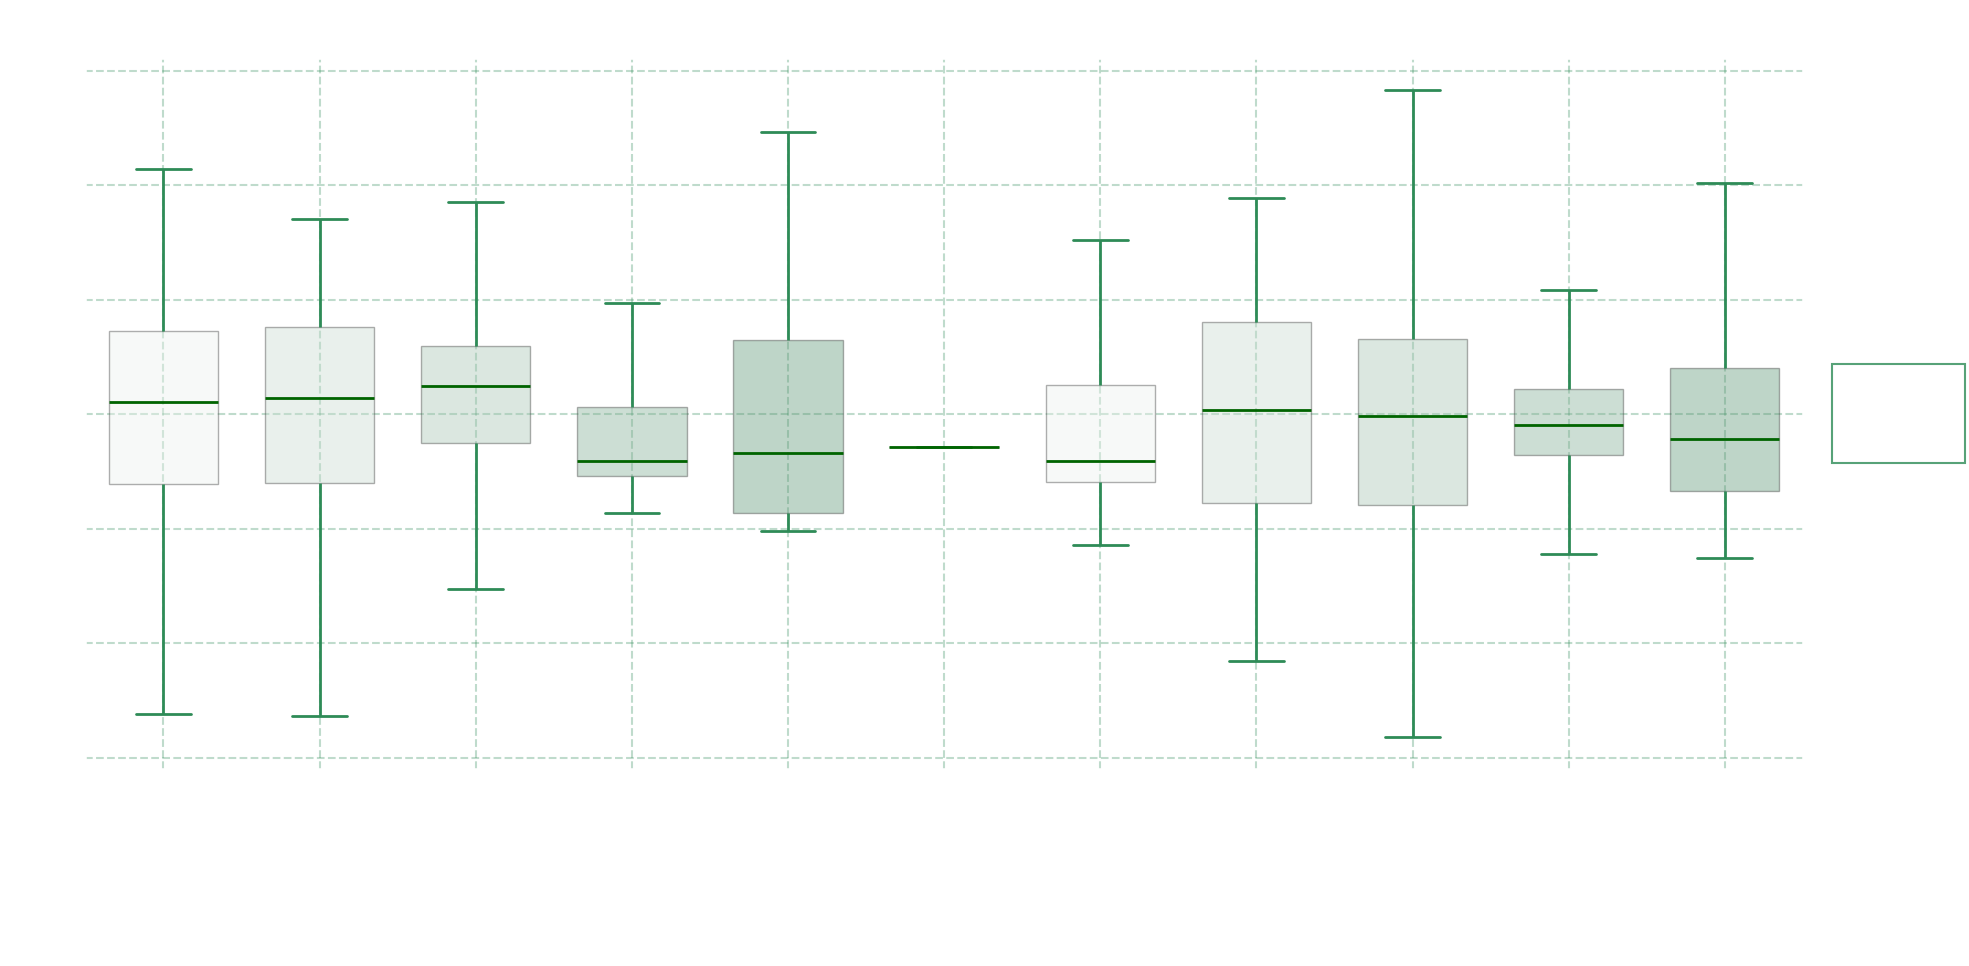

In [166]:
# Configuration du style
sns.set_style("dark")
colors = sns.light_palette("seagreen", n_colors=6)

# Création de la figure avec fond transparent
fig, ax = plt.subplots(figsize=(20, 10))
fig.patch.set_alpha(0.0)

# Création du boxplot avec palette verte
sns.boxplot(
    x='variable',
    y='value',
    data=df_melt,
    showfliers=False,
    width=0.7,
    palette=colors,
    medianprops={"color": "darkgreen", "linewidth": 2},
    boxprops={"alpha": .4},
    whiskerprops={"linewidth": 2, "color": "seagreen"},
    capprops={"linewidth": 2, "color": "seagreen"}
)

# Personnalisation du graphique
plt.title('Distribution Normalisées des Variables Spotify', 
          fontsize=20, 
          pad=20, 
          fontweight='bold',
          color='white')

plt.xlabel('Variables', fontsize=14, labelpad=10, color='white')
plt.ylabel('Valeurs Normalisées', fontsize=14, labelpad=10, color='white')

# Rotation des labels de l'axe x
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')

# Personnalisation de la grille
ax.grid(True, linestyle='--', alpha=0.3, color='seagreen')

# Ajout d'un fond transparent pour l'axe
ax.set_facecolor('none')

# Ajout de la légende avec statistiques
stats = df_melt.groupby('variable')['value'].agg(['mean', 'std', 'min', 'max'])
legend_text = f"Statistiques :\n"
legend_text += f"Moyenne : {stats['mean'].mean():.2f}\n"
legend_text += f"Écart-type : {stats['std'].mean():.2f}\n"
legend_text += f"Min : {stats['min'].min():.2f}\n"
legend_text += f"Max : {stats['max'].max():.2f}"

plt.text(1.02, 0.5, legend_text,
         transform=ax.transAxes,
         bbox=dict(facecolor='none', edgecolor='seagreen', alpha=0.8),
         fontsize=12,
         color='white',
         verticalalignment='center')

# Ajustement des marges
plt.tight_layout()

# Sauvegarde en PNG transparent
plt.savefig('spotify_distribution.png', 
            dpi=300, 
            bbox_inches='tight',
            transparent=True)

# Affichage du graphique
plt.show()

In [96]:
#Removing outliers
from scipy.stats import zscore
z_scores = zscore(spotify_scaled)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
spotify_scaled = spotify_scaled[filtered_entries]


In [97]:
#merge the cleaned data with the categorical columns
spotify_cleaned = pd.concat([spotify_scaled, spotify[['Album_type', 'Artist', 'Title','Album','Stream']]], axis=1)
spotify_cleaned['Stream_log'] = np.log1p(spotify_cleaned['Stream'])

In [98]:
X = spotify_cleaned.drop(columns=['Stream','Stream_log'])
X.fillna(0, inplace=True)
y = np.log1p(spotify_cleaned['Stream_log'])
y = y.fillna(0)


In [142]:
transformer = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Album_type', 'Artist']),
    ('text_title', TfidfVectorizer(stop_words='english', max_features=50), 'Title'),
    ('text_album', TfidfVectorizer(stop_words='english', max_features=50), 'Album')
])

pipeline = make_pipeline(transformer, 
                         RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 0.17612918898163124
R2: 0.33133128102981


In [143]:
np.expm1(mean_squared_error(y_test, y_pred))

0.19259211846032556

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

pipeline = make_pipeline(transformer, RandomForestRegressor(random_state=42))

# Grille de paramètres pour le RandomForestRegressor
param_dist = {
    'randomforestregressor__n_estimators': randint(50, 300),  # Nombre d'arbres
    'randomforestregressor__max_depth': randint(3,15),   # Profondeur maximale
    'randomforestregressor__min_samples_split': randint(2, 10),  # Échantillons pour diviser un nœud
    'randomforestregressor__min_samples_leaf': randint(1, 4),    # Échantillons dans une feuille
    'randomforestregressor__max_features': ['sqrt', 'log2', None],  # Nombre de features
    'randomforestregressor__bootstrap': [True, False]            # Utilisation du bootstrap
}

# Recherche aléatoire des meilleurs paramètres
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=20,  # Nombre d'itérations (combinaisons à tester)
    cv=3,       # Nombre de folds réduit
    scoring='r2',
    n_jobs=-1,  # Utilisation de tous les cœurs disponibles
    random_state=42
)

# Entraînement
random_search.fit(X_train, y_train)

# Meilleurs paramètres
print('Best parameters:', random_search.best_params_)


Best parameters: {'randomforestregressor__bootstrap': True, 'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': None, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__min_samples_split': 4, 'randomforestregressor__n_estimators': 264}


In [145]:
transformer = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Album_type', 'Artist']),
    ('text_title', TfidfVectorizer(stop_words='english', max_features=50), 'Title'),
    ('text_album', TfidfVectorizer(stop_words='english', max_features=50), 'Album')
])

pipeline = make_pipeline(transformer, 
                         RandomForestRegressor(
                                n_estimators=264, 
                                random_state=42, 
                                n_jobs=-1,
                                max_depth=None,
                                max_features=None,
                                min_samples_leaf=2,
                                min_samples_split=4,
                                bootstrap=True))
                         

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 0.16513536366117323
R2: 0.37306898013645473


In [170]:

# First fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Calculate predictions for both training and test sets
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Calculate metrics for training set
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# Calculate metrics for test set
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print("Training metrics:")
print(f"MSE: {train_mse:.4f}")
print(f"R2: {train_r2:.4f}")
print("\nTest metrics:")
print(f"MSE: {test_mse:.4f}")
print(f"R2: {test_r2:.4f}")

# Calculate the difference between training and test metrics
mse_diff = abs(train_mse - test_mse)
r2_diff = abs(train_r2 - test_r2)

print("\nDifference between training and test metrics:")
print(f"MSE difference: {mse_diff:.4f}")
print(f"R2 difference: {r2_diff:.4f}")


Training metrics:
MSE: 0.0222
R2: 0.9054

Test metrics:
MSE: 0.1761
R2: 0.3313

Difference between training and test metrics:
MSE difference: 0.1540
R2 difference: 0.5741
